 Libraries

In [38]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import t, poisson
import statsmodels.api as sm
from wordcloud import WordCloud

Load Data

In [39]:
def load_data():
    file_path = r"C:\Users\FAST LAPTOP\OneDrive\Desktop\GitHub\phalistine/fatalities.csv"
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        return None

Handle Missing Values

In [40]:
 
def handle_missing_values():
    global df
    if df.empty:
        print("Please load the data first!")
    else:
        missing_val = df.isnull().sum()[df.isnull().sum() > 0]
        df.drop(['ammunition'], axis=1, inplace=True)
        df['took_part_in_the_hostilities'].replace(np.nan, 'Unknown', inplace=True)
        mean_age = df['age'].mean()
        df['age'].replace(np.nan, mean_age, inplace=True)
        df.dropna(subset=['gender'], axis=0, inplace=True)
        df['place_of_residence'].replace(np.nan, 'Unknown', inplace=True)
        df['place_of_residence_district'].replace(np.nan, 'Unknown', inplace=True)
        df['type_of_injury'].replace(np.nan, 'Unknown', inplace=True)
        df['citizenship'].unique()
        df['casualty_count'] = 1
        df['event_date'] = pd.to_datetime(df['date_of_event'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.date
        df['e_year'] = pd.to_datetime(df['date_of_event'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.year
        df['e_month'] = pd.to_datetime(df['date_of_event'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.month
        df['e_day'] = pd.to_datetime(df['date_of_event'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.day
        df['death_date'] = pd.to_datetime(df['date_of_death'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.date
        df['d_year'] = pd.to_datetime(df['date_of_death'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.year
        df['d_month'] = pd.to_datetime(df['date_of_death'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.month
        df['d_day'] = pd.to_datetime(df['date_of_death'], format='%d/%m/%Y', dayfirst=True, errors='coerce').dt.day

        return df


univariate_analysis

In [41]:
def univariate_analysis(df):
    if df.empty:
        print("Please load the data first!")
    else:
        # Perform univariate analysis on the loaded data
        # For demonstration, let's print a message
        plt.figure(figsize=(20, 20))
        sns.set_style("whitegrid")
        palette = "viridis"

        plt.subplot(321)
        sns.histplot(df['e_year'], bins=df['e_year'].nunique(), color='#1f77b4')
        plt.title('Number of Events Occurred by Year: Histogram', color='black', weight='bold', fontsize=14)
        plt.ylabel('Count')
        plt.xlabel(None)

        plt.subplot(322)
        sns.countplot(x=df['e_year'], palette=palette)
        plt.title('Number of Events Occurred by Year: Countplot', color='black', weight='bold', fontsize=14)
        plt.ylabel('Count')
        plt.xlabel(None)

        plt.subplot(323)
        sns.histplot(df['e_month'], bins=12, color='#ff7f0e')
        plt.title('Number of Events Occurred by Month: Histogram', color='black', weight='bold', fontsize=14)
        plt.ylabel('Count')
        plt.xlabel(None)
        plt.subplot(324)
        sns.countplot(x=df['e_month'], palette=palette)
        plt.title('Number of Events Occurred by Month: Countplot', color='black', weight='bold', fontsize=14)
        plt.ylabel('Count')
        plt.xlabel(None)

        plt.subplot(325)
        sns.lineplot(data=df['e_day'].value_counts().sort_index(), color='#2ca02c')
        plt.title('Number of Events Occurred by Day: Lineplot', color='black', weight='bold', fontsize=14)
        plt.ylabel('Count')
        plt.xlabel('Day')

        plt.subplot(326)
        sns.countplot(x=df['e_day'], palette=palette)
        plt.title('Number of Events Occurred by Day: Countplot', color='black', weight='bold', fontsize=14)
        plt.ylabel('Count')
        plt.xlabel('Day')

        plt.tight_layout()
        plt.show()

        plt.tight_layout()
        plt.show()

        print("Univariate analysis performed.")



display_summary_stats

In [42]:
 
def display_summary_stats(df):
    if df.empty:
        print("Please load the data first!")
    else:
        summary_stats = df.describe()  # Generate summary statistics
        print(summary_stats)
        print("Summary statistics displayed.")

perform_eda

In [43]:
 def perform_eda(df):
    if df.empty:
        print("Please load the data first!")
    else:
         # Task 1: Calculate casualty counts by citizenship and visualize the percentages
        casualty_citizen = df.groupby('citizenship')['casualty_count'].sum()
        percentage_casualties = (casualty_citizen / casualty_citizen.sum()) * 100
        Percentage_Casualty_DF = pd.DataFrame({'Citizenship': percentage_casualties.index, 'Percentage': percentage_casualties.values})
        Percentage_Casualty_DF['Percentage'] = Percentage_Casualty_DF['Percentage'].map('{:.2f}%'.format)
        Percentage_Casualty_DF = Percentage_Casualty_DF.sort_values(by='Percentage', ascending=False).reset_index(drop=True)

        plt.figure(figsize=(8, 6))
        Percentage_Casualty_DF['Percentage'] = Percentage_Casualty_DF['Percentage'].str.rstrip('%').astype(float)
        sns.barplot(x='Citizenship', y='Percentage', data=Percentage_Casualty_DF, palette='coolwarm')
        plt.title('Percentage of Casualties by Citizenship', fontsize=16, color='blue')  # Title font color
        plt.xlabel('Citizenship', fontsize=12, color='black')  # X label font color
        plt.ylabel('Percentage', fontsize=12, color='red')  # Y label font color
        plt.xticks(rotation=45, color='purple')  # X ticks font color
        plt.yticks(color='orange')  # Y ticks font color
        plt.tight_layout()
        plt.show()

    # Task 2: Visualize the distribution of total casualties between Israeli and Palestinian citizens
        filtered_df = df[df['citizenship'].isin(['Israeli', 'Palestinian'])]
        casualty_citizen = filtered_df['citizenship'].value_counts()

        plt.figure(figsize=(4, 4))
        plt.pie(casualty_citizen, labels=casualty_citizen.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title('Distribution of Total Casualties (Israeli vs Palestinian)', fontsize=16, color='green')  # Title font color
        legend = plt.legend(title='Citizenship', fontsize=10)
        legend.get_title().set_color('Grey')  # Set color for legend title
        plt.show()

    # Task 3: Display overall yearly fatality count
        yearly_casualty_count = df.groupby('e_year')['casualty_count'].sum().reset_index()
    # Create line plot for yearly casualty count
    # Plotting the line plot for yearly casualty count
        plt.figure(figsize=(10, 6))

    # Creating a color gradient for the lines
        colors = plt.cm.viridis(np.linspace(0, 1, len(yearly_casualty_count)))

        for i in range(len(yearly_casualty_count)):
            plt.plot(
                yearly_casualty_count['e_year'].iloc[i],
                yearly_casualty_count['casualty_count'].iloc[i],
                marker='o',
                linestyle='-',
                color=colors[i]
            )

        plt.title('Yearly Casualty Count')
        plt.xlabel('Year')
        plt.ylabel('Casualty Count')
        plt.grid(True)
        plt.show()


    # Task 4: Find the maximum casualty month in each year
        max_casualty_month = df.groupby(['e_year', 'e_month'])['casualty_count'].sum().reset_index()
        max_casualty_month = max_casualty_month.loc[max_casualty_month.groupby('e_year')['casualty_count'].idxmax()]
        max_casualty_month['e_month'] = max_casualty_month['e_month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
    # Print or display max_casualty_month
    
    # Convert month names to numeric values for plotting
        month_numbers = pd.to_datetime(max_casualty_month['e_month'], format='%B').dt.month

    # Create a line plot
        plt.figure(figsize=(10, 6))
    
        plt.plot(max_casualty_month['e_year'], month_numbers, marker='o')
        plt.title('Maximum Casualty Month in Each Year')
        plt.xlabel('Year')
        plt.ylabel('Month')
        plt.yticks(range(1, 13), pd.date_range('2022-01-01', periods=12, freq='M').strftime('%B'))  # Set y-axis to display months
        plt.grid(True)
        plt.show()

    
   # Define age groups and categorize ages
        bins = [0, 17, 39, 49, 64, float('inf')]
        labels = ['Minor (0-17)', 'Young Adults (18-39)', 'Early Middle-Aged Adults (40-49)', 'Late Middle-Aged Adults (50-64)', 'Old Adults (≥65)']
        df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Calculate total casualties by citizenship in each age group
        age_citizenship_casualties = df.groupby(['age_group', 'citizenship'], observed=False)['casualty_count'].sum().reset_index()
        age_citizenship_casualties_pivot = age_citizenship_casualties.pivot(index='age_group', columns='citizenship', values='casualty_count')

    # Create stacked bar plot
        plt.figure(figsize=(10, 6))
        age_citizenship_casualties_pivot.plot(kind='bar', stacked=True)
        plt.title('Total Casualties by Citizenship in Each Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Total Casualties')
        plt.legend(title='Citizenship')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    # Define age groups and categorize ages
        bins = [0, 17, 39, 49, 64, float('inf')]
        labels = ['Minor (0-17)', 'Young Adults (18-39)', 'Early Middle-Aged Adults (40-49)', 'Late Middle-Aged Adults (50-64)', 'Old Adults (≥65)']
        df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Calculate total casualties by citizenship in each age group
        age_citizenship_casualties = df.groupby(['age_group', 'citizenship'], observed=False)['casualty_count'].sum().reset_index()
        age_citizenship_casualties_pivot = age_citizenship_casualties.pivot(index='age_group', columns='citizenship', values='casualty_count')

        plt.subplots(figsize=(8, 6))

        plt.title('Fatalities by Gender, Citizenship, Age: Boxplot', color='green', weight='bold', fontsize=13)
        sns.boxplot(x=df['gender'], y=df['age'], hue=df['citizenship'])
        plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
        plt.xlabel(None), plt.ylabel(None)

        plt.show()

    # Task 7: Visualize total casualties in each region
        region_casualties = df.groupby('event_location_region', observed=True)['casualty_count'].sum().reset_index()
    # Create bar plot for casualties in each region
    # Create stacked bar plot
        age_citizenship_casualties_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Total Casualties by Citizenship in Each Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Total Casualties')
        plt.legend(title='Citizenship')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    # Task 8: Plot total casualties by citizenship in each region
        region_citizenship_casualties = df.groupby(['event_location_region', 'citizenship'])['casualty_count'].sum().reset_index()
        region_citizenship_casualties_pivot = region_citizenship_casualties.pivot(index='event_location_region', columns='citizenship', values='casualty_count')
    # Create stacked horizontal bar plot 
    # Create stacked horizontal bar plot
        region_citizenship_casualties_pivot.plot(kind='barh', stacked=True, figsize=(10, 8))
        plt.title('Total Casualties by Citizenship in Each Region')
        plt.xlabel('Total Casualties')
        plt.ylabel('Region')
        plt.legend(title='Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # Task 9: Visualize casualties in districts in Gaza Strip
        gaza_strip_data = df[df['event_location_region'] == 'Gaza Strip']
        gaza_strip_district_casualties = gaza_strip_data.groupby('event_location_district')['casualty_count'].sum().reset_index()
    # Create bar plot for Gaza Strip districts
        plt.figure(figsize=(12, 6))
        plt.bar(gaza_strip_district_casualties['event_location_district'], gaza_strip_district_casualties['casualty_count'])
        plt.title('Casualties in Each District in Gaza Strip')
        plt.xlabel('District')
        plt.ylabel('Total Casualties')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    # Continue similar steps for the remaining tasks...
    
    # Assuming 'df' is your DataFrame containing the necessary columns

    #Task 10
        west_bank_data = df[df['event_location_region'] == 'West Bank']
        west_bank_district_casualties = west_bank_data.groupby('event_location_district')['casualty_count'].sum().reset_index()

    # Create bar plot for West Bank districts
        plt.figure(figsize=(12, 6))
        plt.bar(west_bank_district_casualties['event_location_district'], west_bank_district_casualties['casualty_count'])
        plt.title('Casualties in Each District in West Bank')
        plt.xlabel('District')
        plt.ylabel('Total Casualties')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


    # Task 11: Visualize casualties in districts in Israel
        israel_data = df[df['event_location_region'] == 'Israel']
        israel_district_casualties = israel_data.groupby('event_location_district')['casualty_count'].sum().reset_index()

    # Create bar plot for Israel districts
        plt.figure(figsize=(12, 6))
        plt.bar(israel_district_casualties['event_location_district'], israel_district_casualties['casualty_count'])
        plt.title('Casualties in Each District in Israel')
        plt.xlabel('District')
        plt.ylabel('Total Casualties')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    #Task 12: Plot casualties by age group and participation in hostilities
        hostility_age = df.groupby(['took_part_in_the_hostilities', 'age_group'], observed=True)['casualty_count'].sum().reset_index()

        plt.figure(figsize=(10, 6))
        sns.barplot(x='age_group', y='casualty_count', hue='took_part_in_the_hostilities', data=hostility_age)
        plt.title('Casualties by Age Group and Participation in Hostilities')
        plt.xlabel('Age Group')
        plt.ylabel('Total Casualties')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    #Task 13: Visualize casualties by citizenship and participation in hostilities
        citizenship_filtered = df[df['citizenship'].isin(['Israeli', 'Palestinian'])]
        hostility_citizenship = citizenship_filtered.groupby(['took_part_in_the_hostilities', 'citizenship'])['casualty_count'].sum().reset_index()

        plt.figure(figsize=(8, 6))
        sns.barplot(x='citizenship', y='casualty_count', hue='took_part_in_the_hostilities', data=hostility_citizenship)
        plt.title('Casualties for Israeli and Palestinian Citizens by Participation in Hostilities')
        plt.xlabel('Citizenship')
        plt.ylabel('Total Casualties')
        plt.legend(title='Participation in Hostilities')
        plt.tight_layout()
        plt.show()
    
    
    #Task 14: Plot casualties by gender
    
        casualty_gender = df.groupby('gender', observed=True)['casualty_count'].sum().reset_index()

        plt.figure(figsize=(8, 6))
        sns.barplot(x='gender', y='casualty_count', data=casualty_gender)
        plt.title('Casualties by Gender')
        plt.xlabel('Gender')
        plt.ylabel('Total Casualties')
        plt.tight_layout()
        plt.show()

    #Task 15: Visualize casualties by gender and citizenship
        filtered_data = df[df['citizenship'].isin(['Israeli', 'Palestinian'])]
        citizenship_gender = filtered_data.groupby(['gender', 'citizenship'])['casualty_count'].sum().reset_index()

        plt.figure(figsize=(8, 6))
        sns.barplot(x='gender', y='casualty_count', hue='citizenship', data=citizenship_gender)
        plt.title('Casualties by Gender and Citizenship')
        plt.xlabel('Gender')
        plt.ylabel('Total Casualties')
        plt.legend(title='Citizenship')
        plt.tight_layout()
        plt.show()

    # Task 16: Plot casualties by age group and gender for Israeli and Palestinian citizens
    
        age_gender = filtered_data.groupby(['age_group', 'gender'])['casualty_count'].sum().reset_index()
        age_gender_pivot = age_gender.pivot(index='age_group', columns='gender', values='casualty_count').fillna(0)

        plt.figure(figsize=(10, 6))
        age_gender_pivot.plot(kind='bar', stacked=True)
        plt.title('Casualties by Age Group and Gender for Israeli and Palestinian Citizens')
        plt.xlabel('Age Group')
        plt.ylabel('Total Casualties')
        plt.legend(title='Gender')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    
    #Task 17: Visualize casualties by entities responsible for killing
    
        killed_count = df.groupby('killed_by')['casualty_count'].sum().reset_index()
        killed_count = killed_count.sort_values(by='casualty_count', ascending=False)

        plt.figure(figsize=(12, 6))
        plt.bar(killed_count['killed_by'], killed_count['casualty_count'])
        plt.title('Casualties by Entity Responsible for Killings')
        plt.xlabel('Entity Responsible for Killings')
        plt.ylabel('Total Casualties')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    
    #Task 18: Plot percentage distribution of top 5 injuries

        injury_type = df.groupby('type_of_injury')['casualty_count'].sum().reset_index()
        injury_type = injury_type.sort_values(by='casualty_count', ascending=False)
        top_5_injuries = injury_type.head(5)

        plt.figure(figsize=(8, 8))
        plt.pie(top_5_injuries['casualty_count'], labels=top_5_injuries['type_of_injury'], autopct='%1.1f%%', startangle=140)
        plt.title('Percentage Distribution of Top 5 Injuries')
        plt.tight_layout()
        plt.show()
    #Task 19: Visualize casualties by entity responsible for killings and type of injury

        killed_injury = df.groupby(['killed_by', 'type_of_injury'])['casualty_count'].sum().reset_index()
        killed_injury_pivot = killed_injury.pivot(index='killed_by', columns='type_of_injury', values='casualty_count').fillna(0)

        plt.figure(figsize=(12, 8))
        killed_injury_pivot.plot(kind='bar', stacked=True)
        plt.title('Casualties by Entity Responsible for Killings and Type of Injury')
        plt.xlabel('Entity Responsible for Killings')
        plt.ylabel('Total Casualties')
        plt.legend(title='Type of Injury', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    
        from wordcloud import WordCloud

        cloud_of_words = ''.join(df['notes'].astype(str))
        facecolor = 'white'
        wordcloud = WordCloud(width=1000, height=700, background_color=facecolor,
                          min_font_size=10, max_font_size=160).generate(cloud_of_words)

        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.xticks([]), plt.yticks([])
        plt.title('Most Frequently Occurring Words in the Notes Feature', color='coral', weight='bold', fontsize=10, pad=15)
        plt.show()
    
    
    # Display all plots together
        plt.tight_layout()
        plt.show()
    
        plt.figure(figsize=(8, 8))
        plt.title('Top 30 Event Locations : Bar Chart', color='green', weight='bold', fontsize=16)
        ax = sns.countplot(x=df['event_location'], palette='Greens', alpha=1, order=df['event_location'].value_counts().head(30).index)

        for p in ax.patches: 
            ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+25))
        plt.xticks(rotation=90), plt.xlabel(None), plt.ylabel(None), plt.yticks([])
        plt.show()
    
   # Splitting the data into predictor (X) and target (y) variables
        X = df[['age']]  # Predictor variable
        y = df['casualty_count']  # Target variable

    # Splitting the data into training and testing sets (80% train, 20% test)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Creating and fitting the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

    # Making predictions on the test set
        y_pred = model.predict(X_test)

    # Plotting the regression line on a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(X_test, y_test, color='blue', label='Actual')
        plt.plot(X_test, y_pred, color='red', label='Predicted')
        plt.title('Regression: Age vs Casualty Count')
        plt.xlabel('Age')
        plt.ylabel('Casualty Count')
        plt.legend()
        plt.show()
    
    # Assuming 'df' contains the necessary data
        monthly_casualties = df.groupby('e_month')['casualty_count'].sum()

    # Estimate parameters for the Poisson distribution
        mu = monthly_casualties.mean()

    # Generate Poisson probabilities for each month
        poisson_probs = poisson.pmf(monthly_casualties.index, mu)

    # Visualize the fit and observed data
        plt.figure(figsize=(8, 6))
        plt.bar(monthly_casualties.index, monthly_casualties, label='Observed')
        plt.plot(monthly_casualties.index, poisson_probs * monthly_casualties.sum(), marker='o', linestyle='-', color='red', label='Poisson Fit')
        plt.title('Poisson Distribution Fit for Monthly Casualties')
        plt.xlabel('Month')
        plt.ylabel('Casualty Count')
        plt.legend()
        plt.show()

    
        age_data = df['age'].fillna(df['age'].mean())  # Filling missing values with mean
        sample_mean = age_data.mean()
        sample_std = age_data.std()
        n = len(age_data)
        alpha = 0.95  # Confidence level
        degrees_freedom = n - 1

        t_critical = t.ppf(1 - (1 - alpha) / 2, degrees_freedom)
        margin_of_error = t_critical * (sample_std / np.sqrt(n))

        lower_bound = sample_mean - margin_of_error
        upper_bound = sample_mean + margin_of_error

    # Plotting mean age confidence interval
        plt.errorbar(1, sample_mean, yerr=margin_of_error, fmt='o', color='blue', label='Mean Age CI')
        plt.axhline(y=sample_mean, color='red', linestyle='--', label='Mean Age')

        plt.title('Confidence Interval for Mean Age')
        plt.xlabel('Mean Age')
        plt.legend()
        plt.show()
    
    
        model = LinearRegression()
        model.fit(X_train, y_train)

    # Calculate confidence intervals for regression coefficients
        X_with_intercept = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_with_intercept).fit()

        coef_intervals = model.conf_int(alpha=0.05)  # 95% confidence interval

        print("Confidence Intervals for Regression Coefficients:")
        print(coef_intervals)
    
    # Plotting confidence intervals for regression coefficients
        coef_intervals = model.conf_int(alpha=0.05)  # 95% confidence interval

        plt.errorbar(coef_intervals.index, coef_intervals[0], yerr=(coef_intervals[1] - coef_intervals[0]) / 2,
             fmt='o', color='green', label='Coefficients CI')

        plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')  # Zero line for reference

        plt.title('Confidence Intervals for Regression Coefficients')
        plt.xlabel('Coefficient Index')
        plt.ylabel('Coefficient Value')
        plt.legend()
        plt.show()
        print("Exploratory data analysis performed.")

     # Select columns for correlation analysis
    columns_for_correlation = ['age', 'gender', 'casualty_count']

# Selecting relevant columns for correlation analysis
    correlation_data = df[columns_for_correlation]

# Calculate correlation matrix
    correlation_matrix = correlation_data.corr()

# Plotting heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Call the function with the DataFrame and selected columns
    plot_correlation_heatmap(df, columns_for_correlation)
 

INSIGHTS

C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

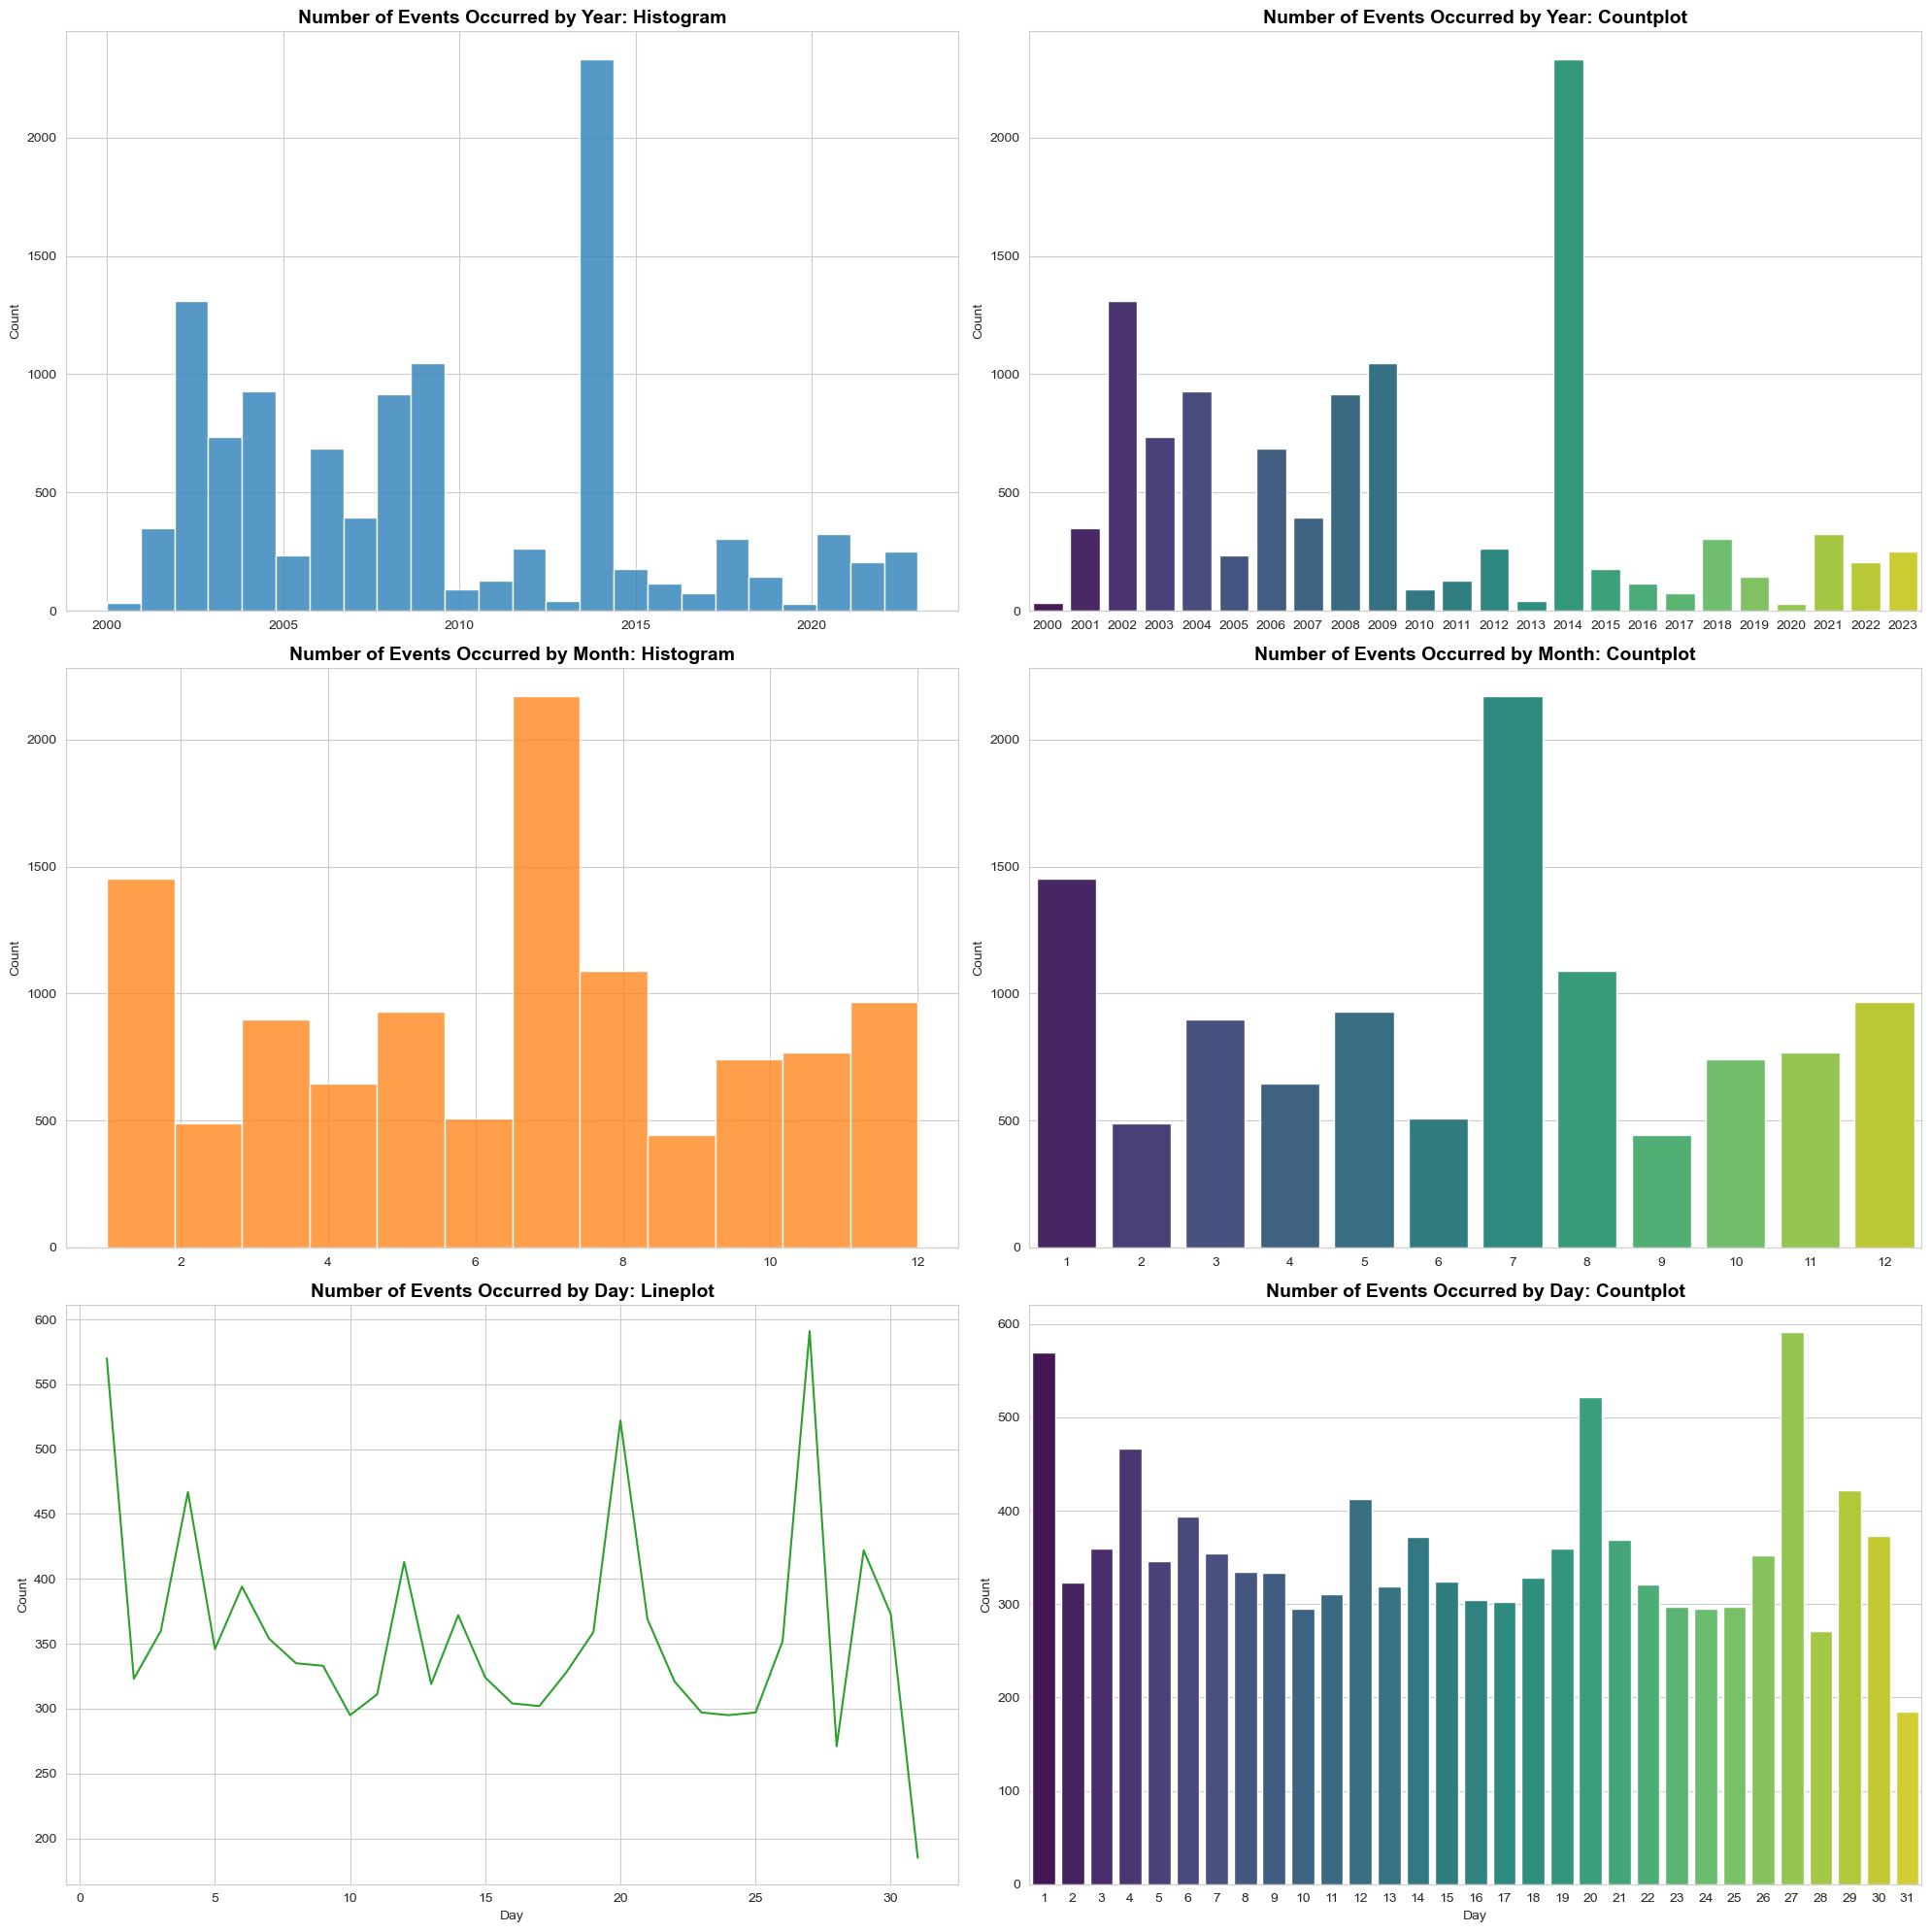

<Figure size 640x480 with 0 Axes>

Univariate analysis performed.
                age  casualty_count        e_year       e_month         e_day  \
count  11104.000000         11104.0  11104.000000  11104.000000  11104.000000   
mean      26.745703             1.0   2009.358880      6.373469     15.591228   
std       13.712738             0.0      6.013591      3.428852      9.094991   
min        1.000000             1.0   2000.000000      1.000000      1.000000   
25%       19.000000             1.0   2004.000000      3.000000      7.000000   
50%       23.000000             1.0   2008.000000      7.000000     16.000000   
75%       31.000000             1.0   2014.000000      9.000000     24.000000   
max      112.000000             1.0   2023.000000     12.000000     31.000000   

             d_year       d_month         d_day  
count  11104.000000  11104.000000  11104.000000  
mean    2009.367525      6.366625     15.605457  
std        6.013189      3.427751      9.092629  
min     2000.000000      1.000000      

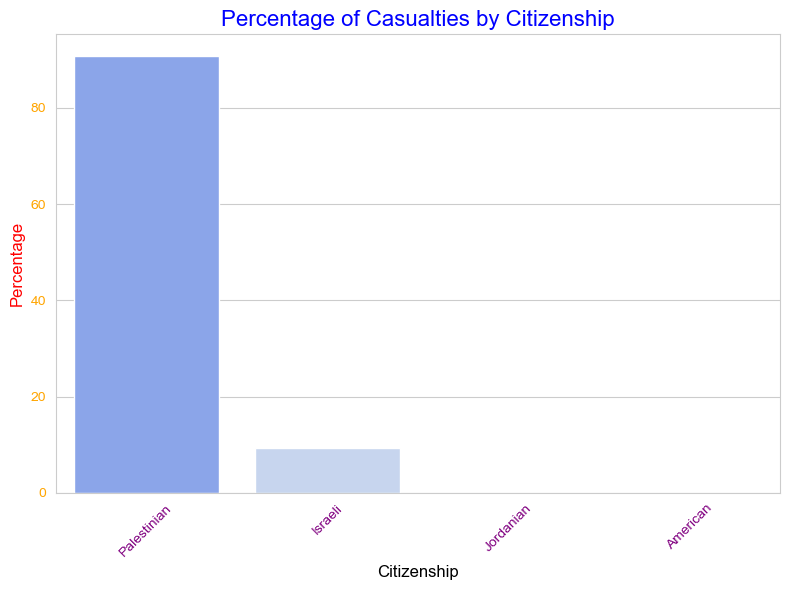

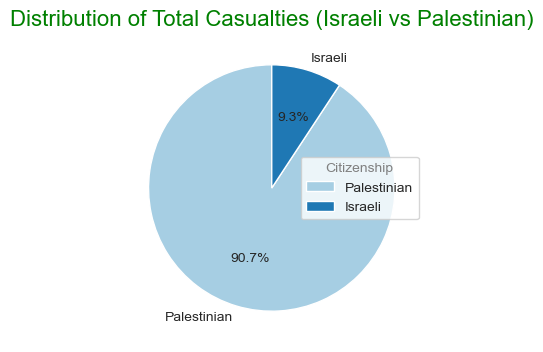

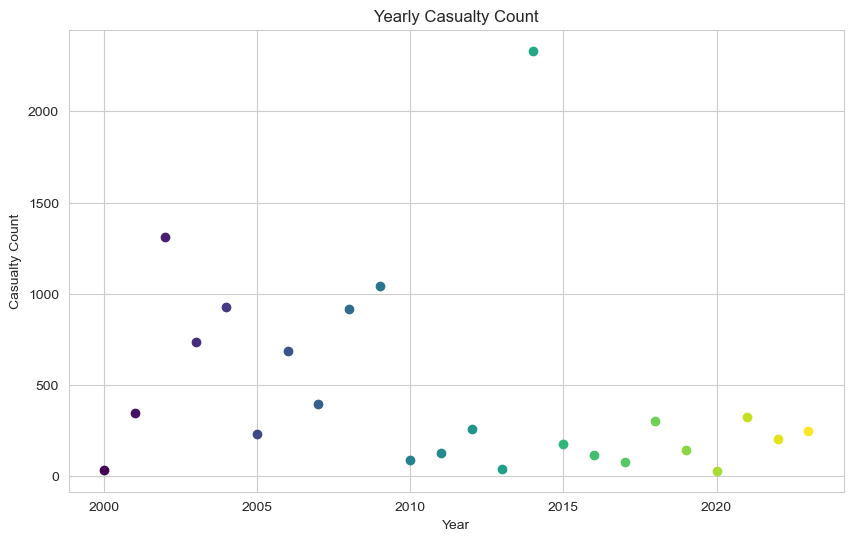

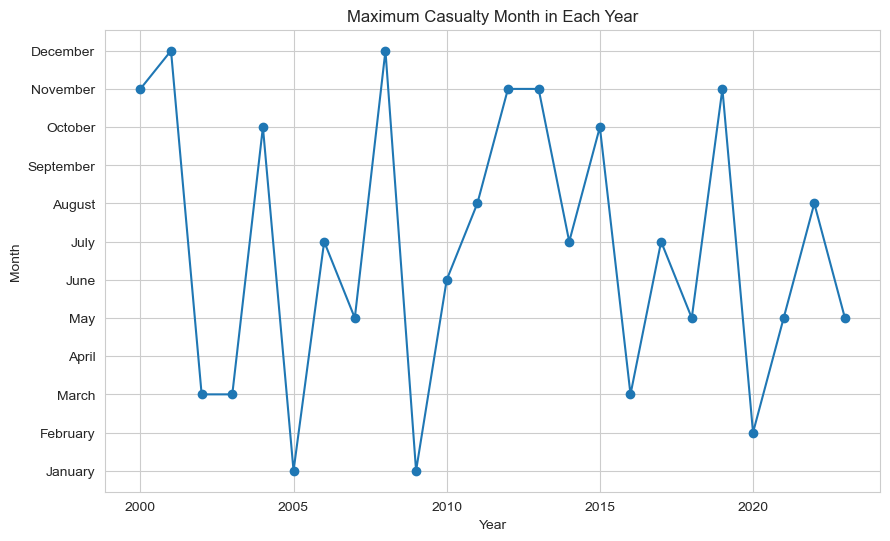

<Figure size 1000x600 with 0 Axes>

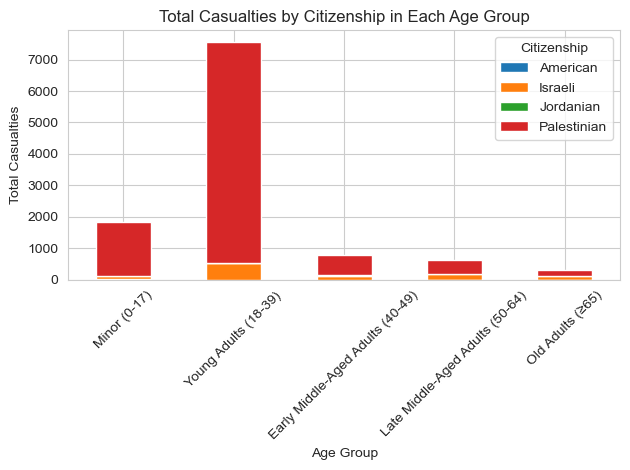

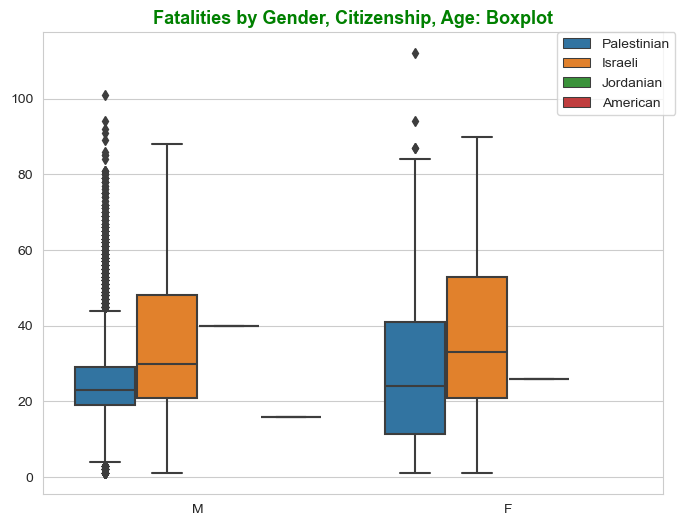

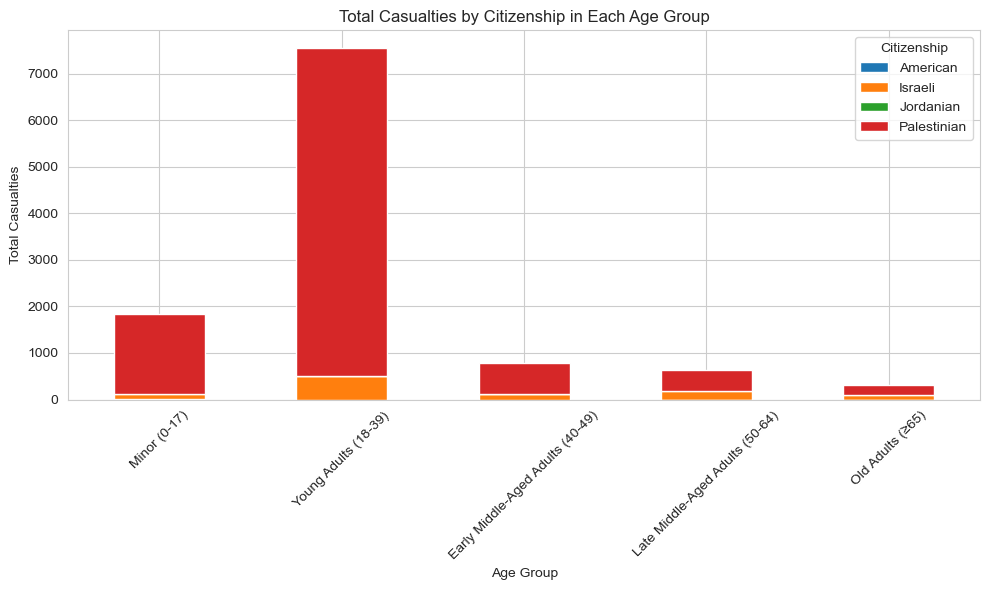

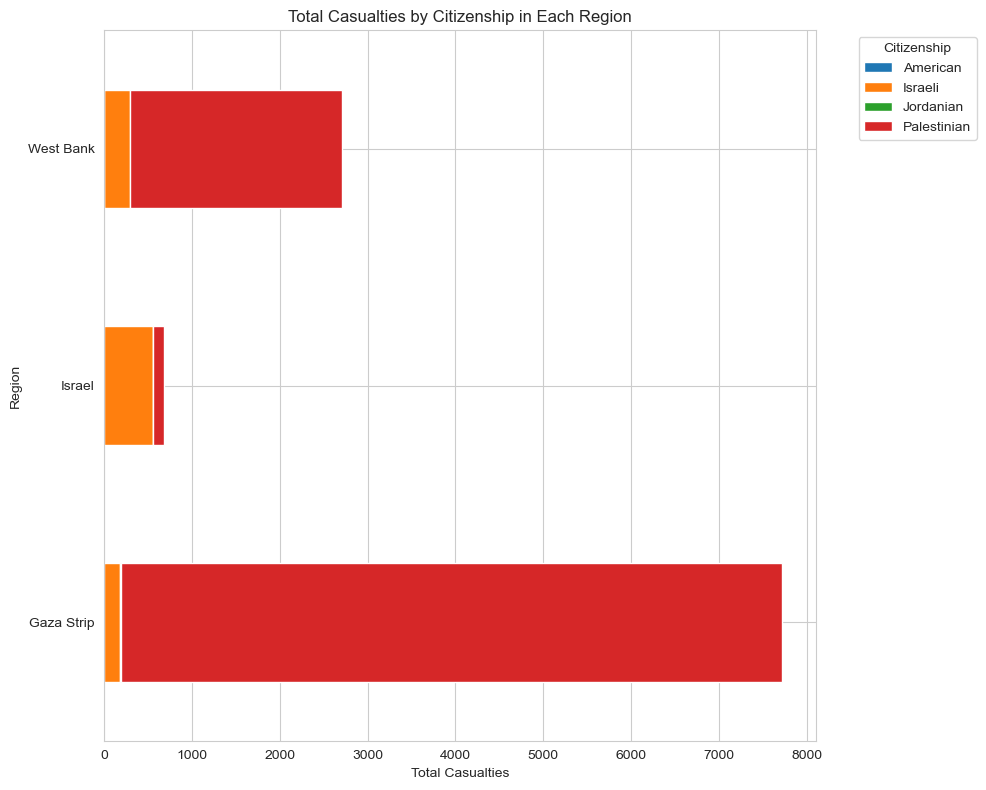

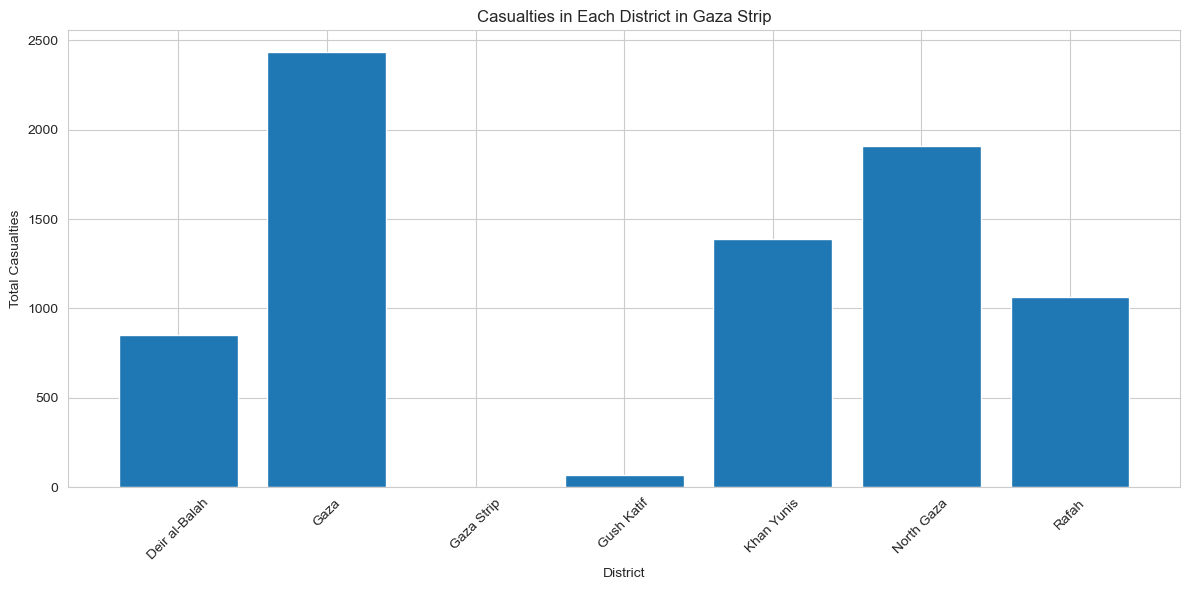

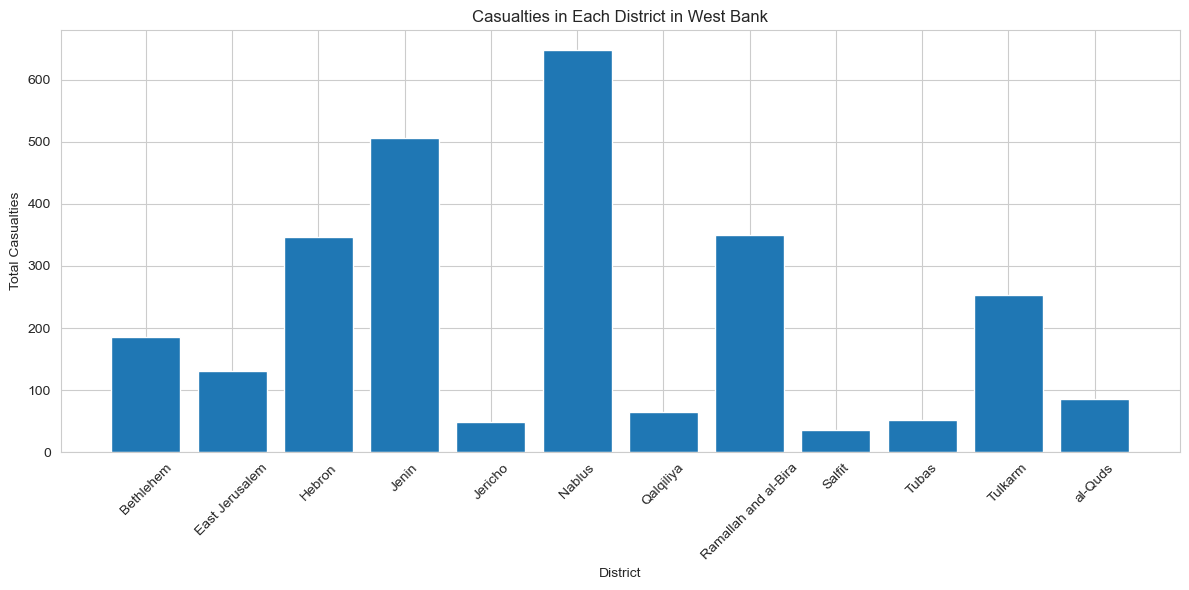

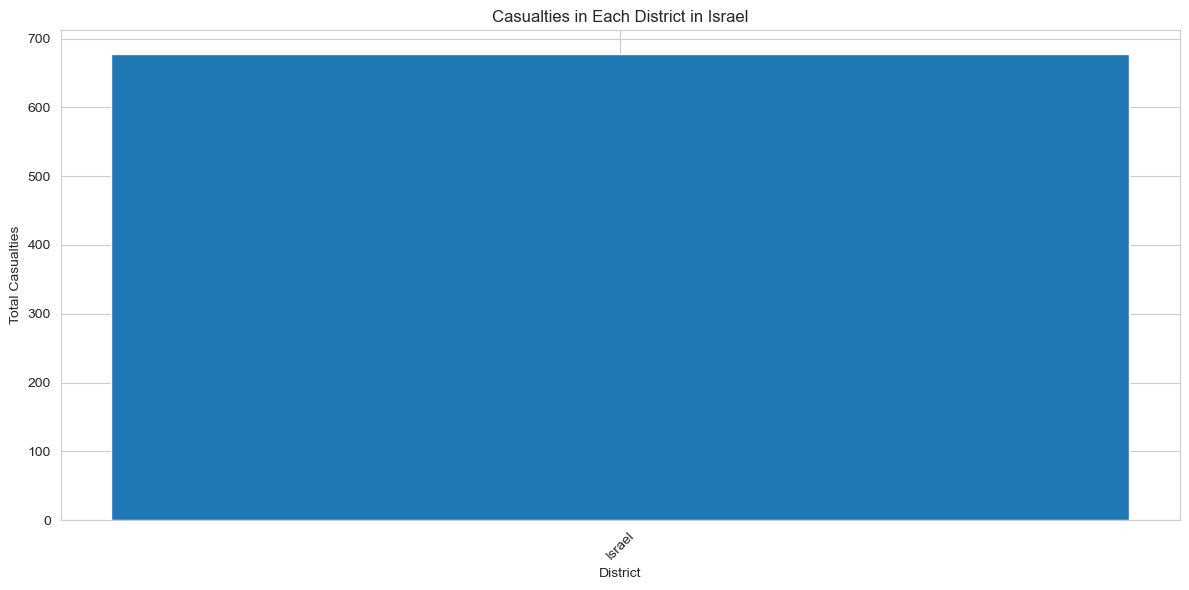

C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


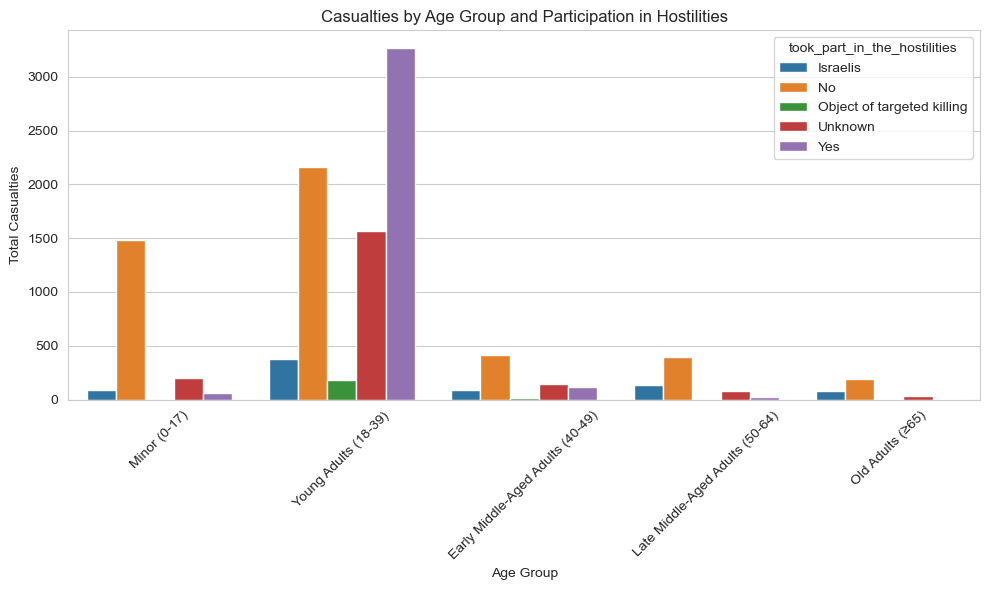

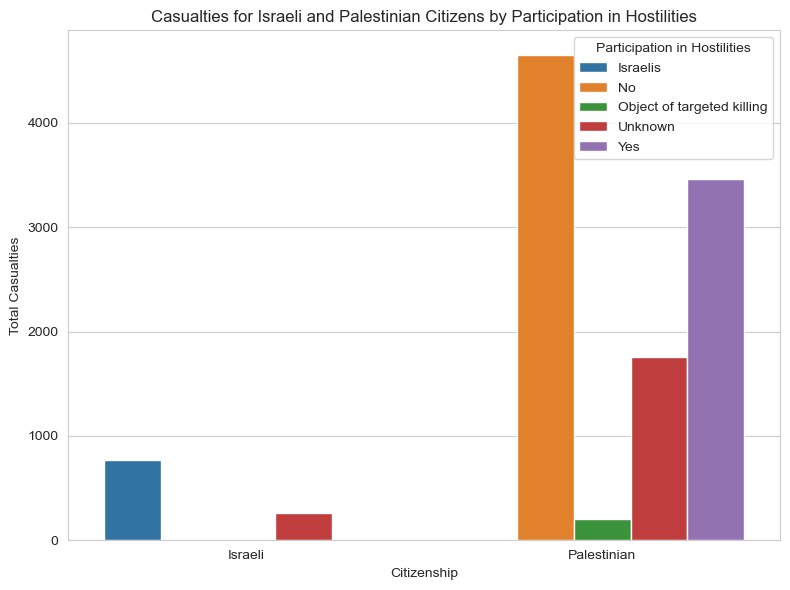

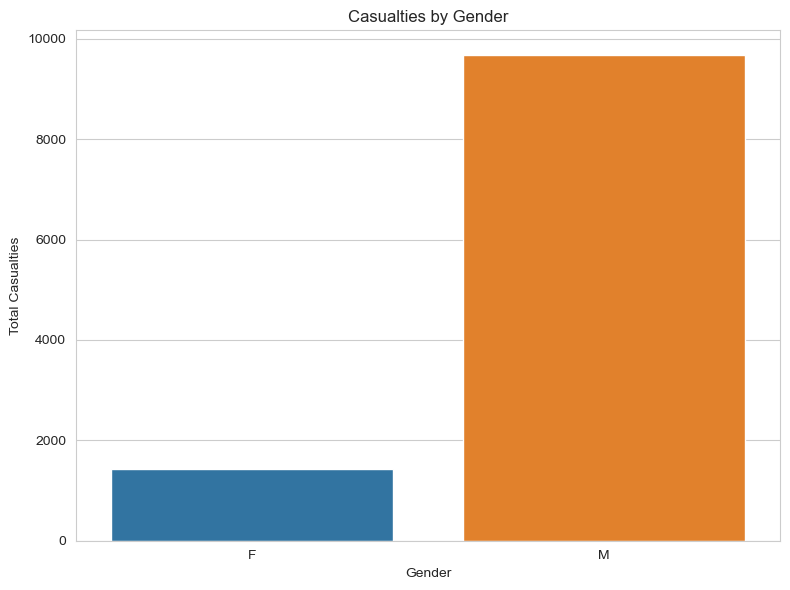

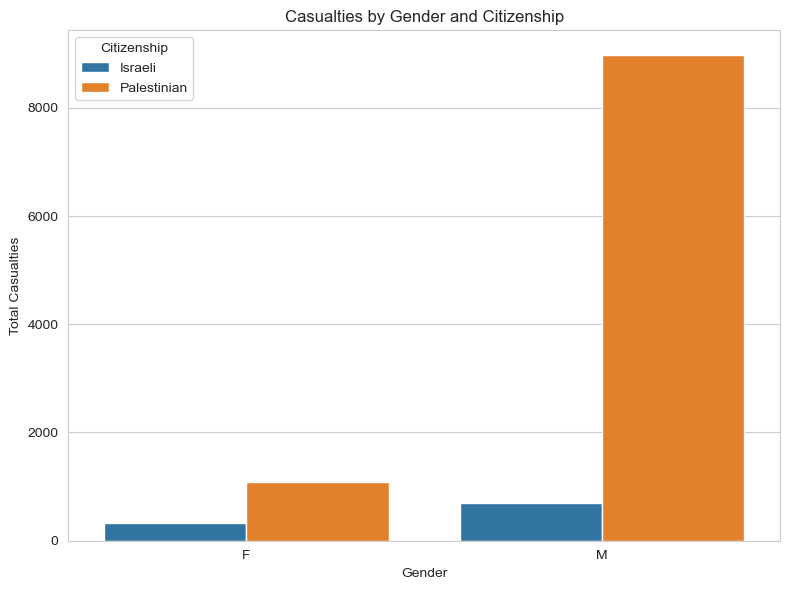

C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_4368\3490310099.py:241: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = filtered_data.groupby(['age_group', 'gender'])['casualty_count'].sum().reset_index()


<Figure size 1000x600 with 0 Axes>

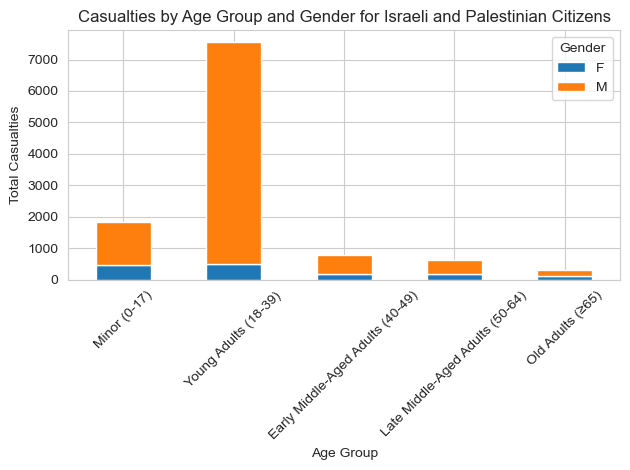

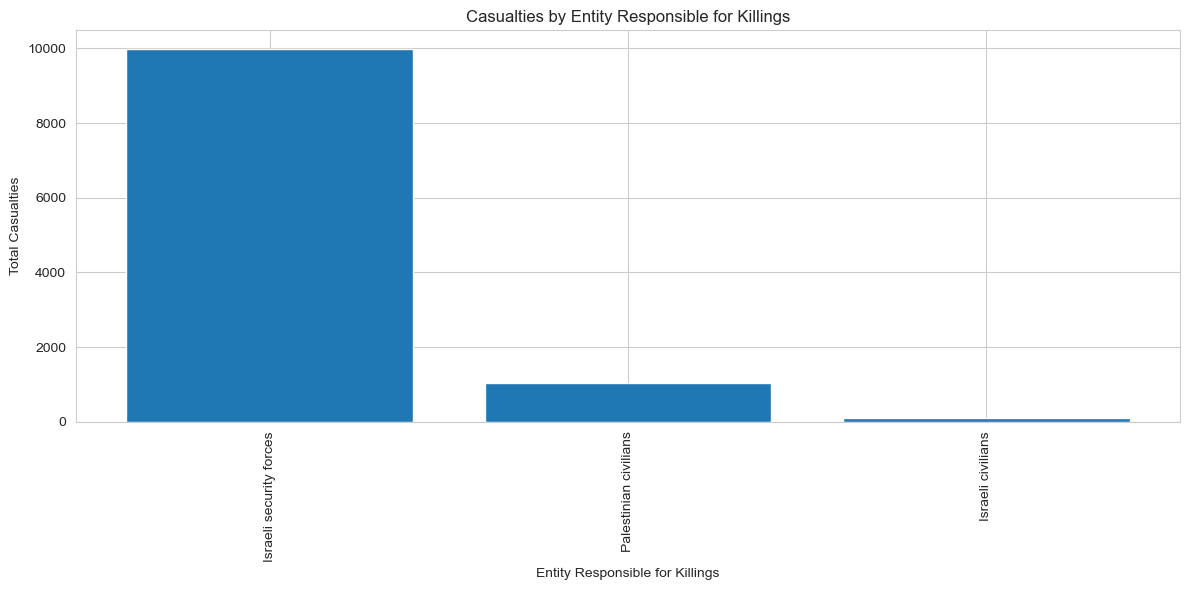

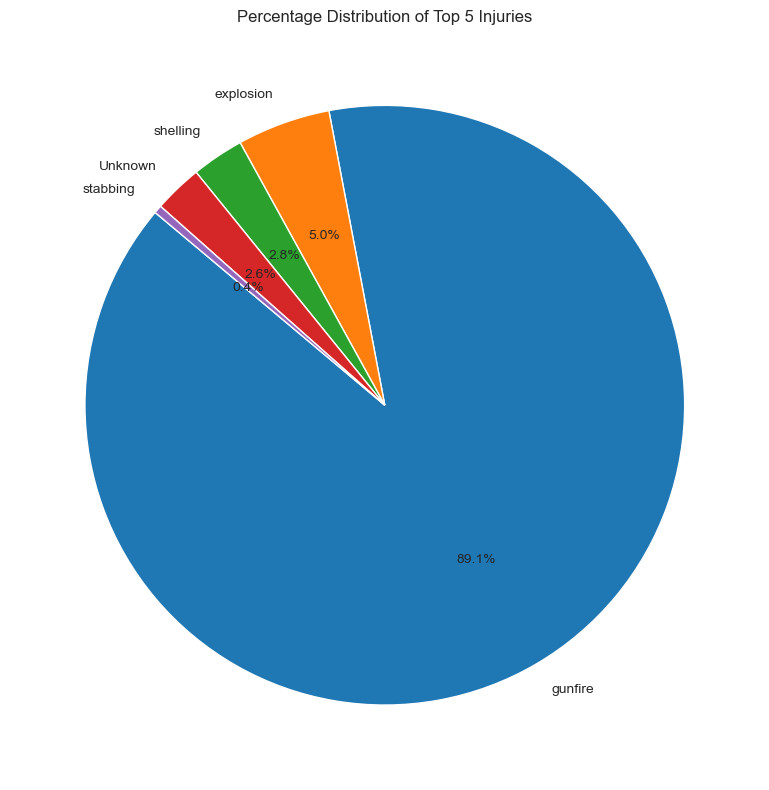

<Figure size 1200x800 with 0 Axes>

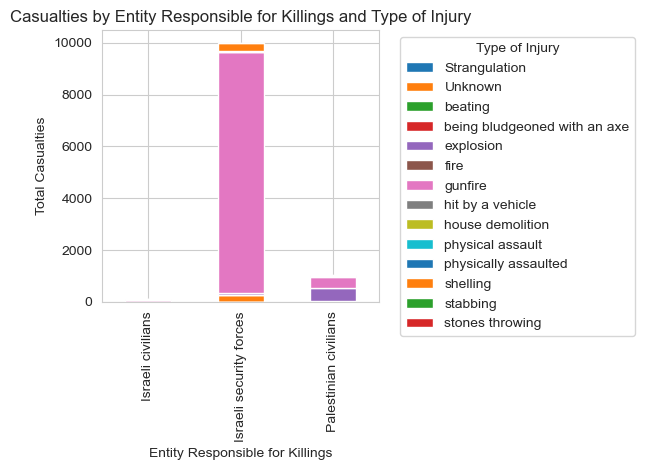

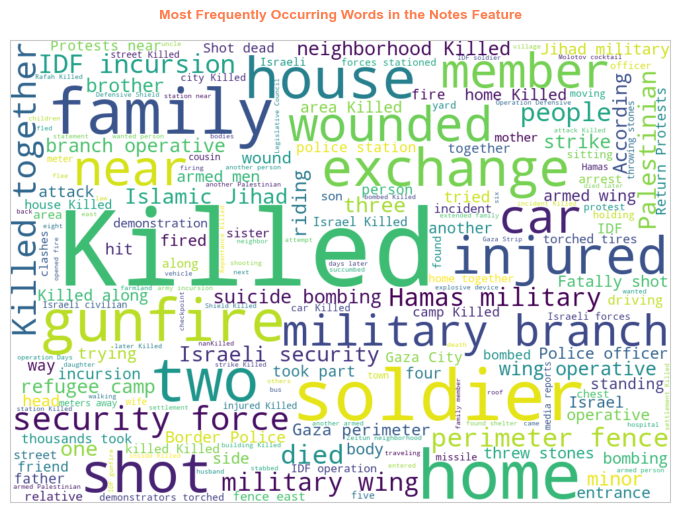

<Figure size 640x480 with 0 Axes>

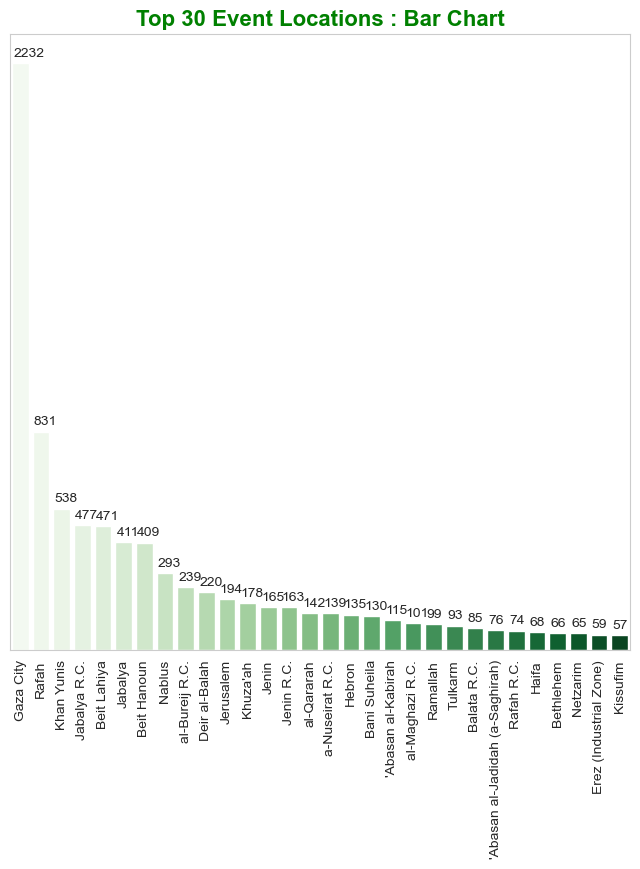

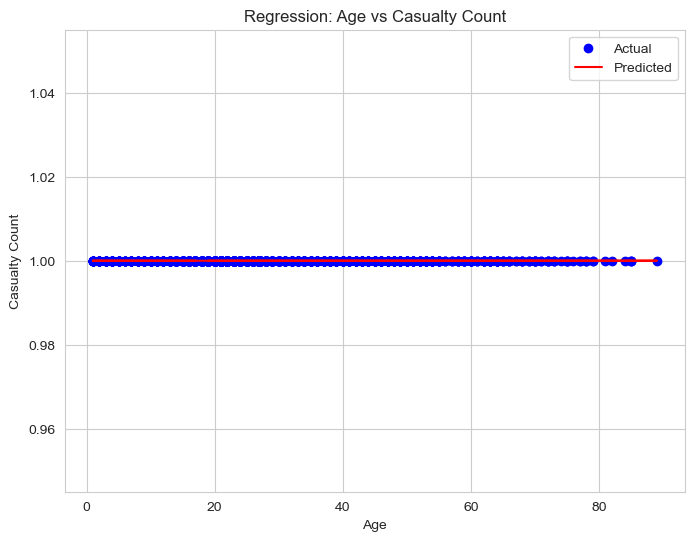

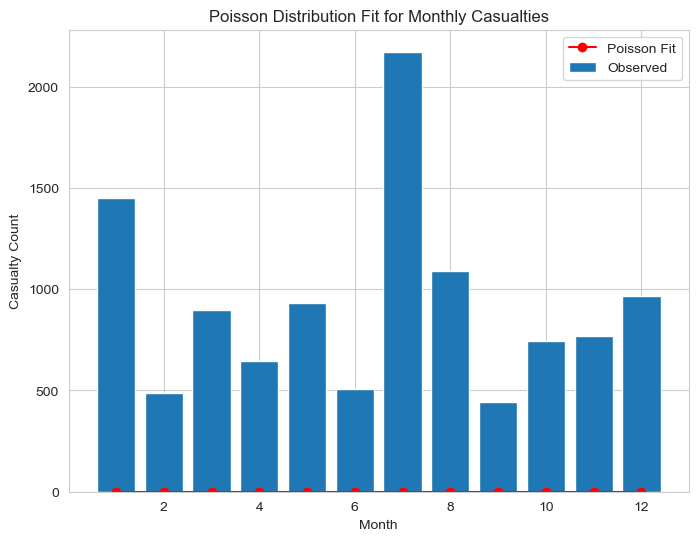

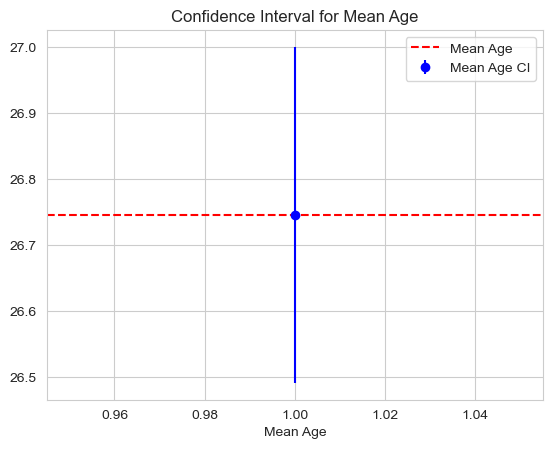

Confidence Intervals for Regression Coefficients:
                  0             1
const  1.000000e+00  1.000000e+00
age   -6.597713e-18  1.393542e-18


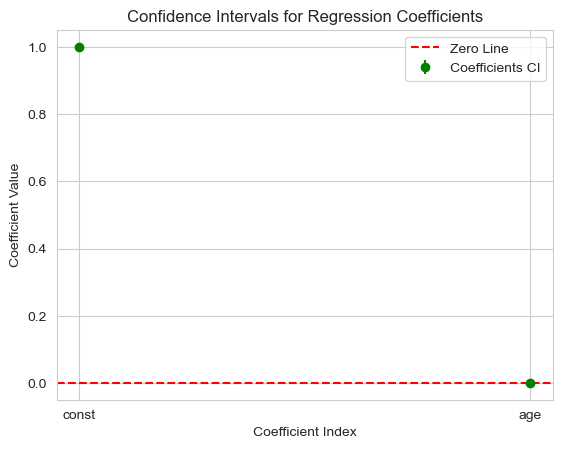

Exploratory data analysis performed.


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_4368\2244017422.py", line 23, in <lambda>
    eda_button = tk.Button(root, text="Perform EDA", command=lambda: perform_eda(df))
                                                                     ^^^^^^^^^^^^^^^
  File "C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_4368\3490310099.py", line 423, in perform_eda
    correlation_matrix = correlation_data.corr()
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\pandas\core\frame.py", line 10704, in corr
    mat = data.to_numpy(dtype=float, na_value=np.nan, copy=False)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\FAST LAPTOP\OneDrive\Documents\An

In [44]:
 def main():
    global df
    df = pd.DataFrame()

    root = tk.Tk()
    root.title("Fatalities Analysis Tool")

    df = load_data()
    # Function to handle missing values
    missing_values_button = tk.Button(root, text="Handle Missing Values", command=handle_missing_values)
    missing_values_button.pack()

    
    # Function for univariate analysis
    univariate_button = tk.Button(root, text="Univariate Analysis", command=lambda: univariate_analysis(df))
    univariate_button.pack()

    # Function to display summary statistics
    summary_stats_button = tk.Button(root, text="Display Summary Stats", command=lambda: display_summary_stats(df))
    summary_stats_button.pack()

    # Function to perform EDA
    eda_button = tk.Button(root, text="Perform EDA", command=lambda: perform_eda(df))
    eda_button.pack()

    root.mainloop()

if __name__ == "__main__":
    main()
